In [1]:
%matplotlib inline


# Voice Activity Detection

### Plot VAD in sound and remove silences.

To see how PySoundTool implements this, see `pysoundtool.dsp.vad`, 
`pysoundtool.dsp.get_vad_samples`, `pysoundtool.dsp.get_vad_stft`, 
and `pysoundtool.dsp.plot_vad`.

Note: this functionality is scheduled to be released in August/September 2020 in the next pypi release.



In [2]:
import os, sys
import inspect
currentdir = os.path.dirname(os.path.abspath(
    inspect.getfile(inspect.currentframe())))
packagedir = os.path.dirname(currentdir)
sys.path.insert(0, packagedir)

import pysoundtool as pyso 
import numpy as np
import IPython.display as ipd

package_dir = '../'
os.chdir(package_dir)
pyso_dir = './'

Using TensorFlow backend.


# Load sample speech audio

Note: this file is available in the PySoundTool repo.



In [3]:
speech = '{}audiodata/python.wav'.format(pyso_dir)
# VAD and filtering work best with high sample rates (48000)
y, sr = pyso.loadsound(speech, sr=48000)
ipd.Audio(y,rate=sr)

# Generate white noise as background noise

In [6]:
white_noise = pyso.dsp.generate_noise(len(y), random_seed = 40)

# Generate speech audio at various SNR levels

## Speech and Noise SNR 20

In [11]:
y_snr20, snr20 = pyso.dsp.add_backgroundsound(y, white_noise, sr=sr, snr = 20,
                                           delay_mainsound_sec = 1,
                                           total_len_sec = 3,
                                           wrap = True, 
                                           random_seed = 40)
# round the measured snr:
snr20 = int(round(snr20))
snr20

20

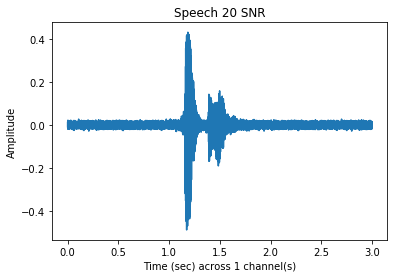

In [12]:
pyso.plotsound(y_snr20, sr = sr, feature_type = 'signal', 
               title = 'Speech {} SNR'.format(snr20))
ipd.Audio(y_snr20,rate=sr)

## Speech and Noise SNR 5

In [15]:
y_snr5, snr5 = pyso.dsp.add_backgroundsound(y, white_noise, sr=sr, snr = 5,
                                           delay_mainsound_sec = 1,
                                           total_len_sec = 3,
                                           wrap = True, 
                                           random_seed = 40)
# round the measured snr:
snr5 = int(round(snr5))
snr5

5

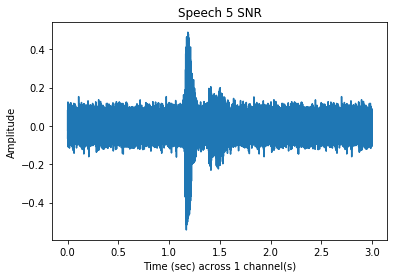

In [17]:
pyso.plotsound(y_snr5, sr = sr, feature_type = 'signal', 
               title = 'Speech {} SNR'.format(snr5))
ipd.Audio(y_snr5,rate=sr)

# Plot Voice Activity ~ with and without padding ~

### Graph Note: 
* If no VAD, yellow dots are placed at the bottom. 
* If VAD, yellow dots are placed at the top.

### If VAD window should be extended / padded:

Set amount of time VAD should be extended in milliseconds. This is useful if one wants to capture more of the speech signal, perhaps missed by the VAD due to noise.

In [22]:
extend_window_ms = 400

### Set background noise reference

For measuring background noise in signal, set amount of beginning noise in milliseconds to use.
**Keeping this small usually results in better VAD**

In [72]:
use_beg_ms = 120

## VAD (SNR 20)

### No Padding

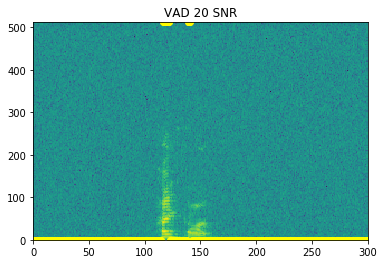

In [73]:
pyso.feats.plot_vad(y_snr20, sr=sr, use_beg_ms = use_beg_ms,
                    title = 'VAD {} SNR'.format(snr20))

### With Padding

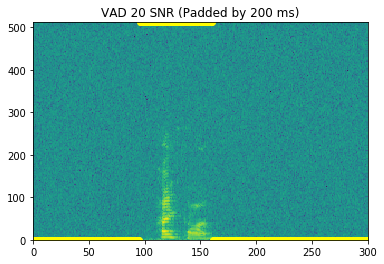

In [79]:
pyso.feats.plot_vad(y_snr20, sr=sr, use_beg_ms = use_beg_ms,
                    extend_window_ms=200,
                    title = 'VAD {} SNR (Padded by {} ms)'.format(snr20, 200))

## VAD (SNR 10)

### No Padding

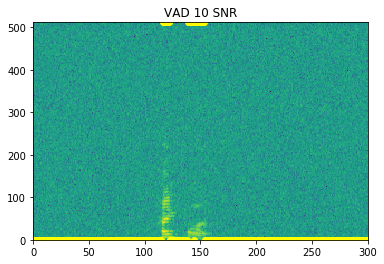

In [26]:
pyso.feats.plot_vad(y_snr10, sr=sr, use_beg_ms = use_beg_ms,
                    title = 'VAD {} SNR'.format(snr10))

### With Padding

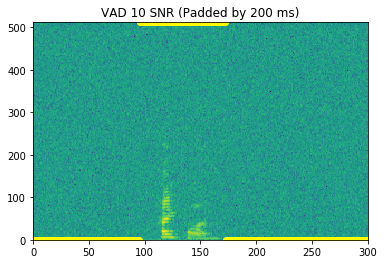

In [80]:
pyso.feats.plot_vad(y_snr10, sr=sr, use_beg_ms = use_beg_ms,
                    extend_window_ms=200,
                    title = 'VAD {} SNR (Padded by {} ms)'.format(snr10, 200))

## VAD (SNR 5)

### No Padding

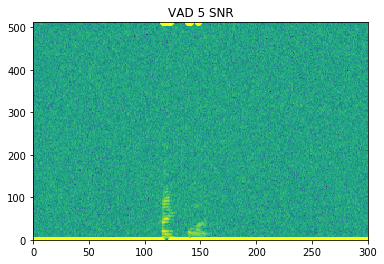

In [28]:
pyso.feats.plot_vad(y_snr5, sr=sr, use_beg_ms = use_beg_ms, 
                    title = 'VAD {} SNR'.format(snr5))

### With Padding

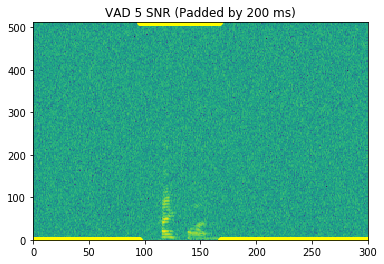

In [81]:
pyso.feats.plot_vad(y_snr5, sr=sr, use_beg_ms = use_beg_ms, 
                    extend_window_ms=200,
                    title = 'VAD {} SNR (Padded by {} ms)'.format(snr5, 200))

# Filter out Noise: Wiener Filter

See `pysoundtool.builtin.filtersignal`

In [30]:
filter_scale = 1 # how strong the filter should be
apply_postfilter = False # to reduce musical noise

## VAD after WF (SNR 20)

In [31]:
y_snr20_wf, sr = pyso.filtersignal(y_snr20, filter_scale=filter_scale, 
                                   apply_postfilter=apply_postfilter)
ipd.Audio(y_snr20_wf,rate=sr)

volume adjusted from 0.47 to 0.4


### No Padding

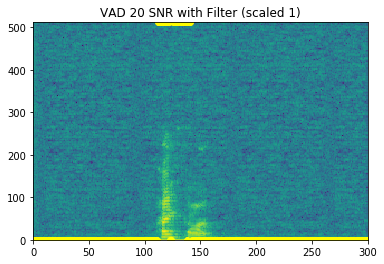

In [32]:
pyso.feats.plot_vad(y_snr20_wf, sr = sr,  use_beg_ms = use_beg_ms,
                    title = 'VAD {} SNR with Filter (scaled {})'.format(
                        snr20, filter_scale))

### With Padding

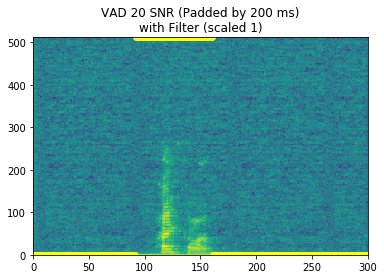

In [82]:
pyso.feats.plot_vad(y_snr20_wf, sr = sr,  use_beg_ms = use_beg_ms,
                    extend_window_ms=200,
                    title = 'VAD {} SNR (Padded by {} ms)\nwith Filter (scaled {})'.format(
                        snr20, 200, filter_scale))

## VAD after WF (SNR 5)

In [37]:
y_snr5_wf, sr = pyso.filtersignal(y_snr5, filter_scale=filter_scale, 
                                   apply_postfilter=apply_postfilter)
ipd.Audio(y_snr5_wf,rate=sr)

volume adjusted from 0.49 to 0.4


### No Padding

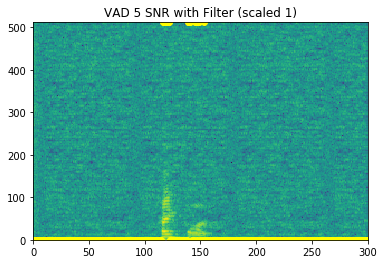

In [38]:
pyso.feats.plot_vad(y_snr5_wf, sr = sr,  use_beg_ms = use_beg_ms,
                    title = 'VAD {} SNR with Filter (scaled {})'.format(
                        snr5, filter_scale))

### With Padding

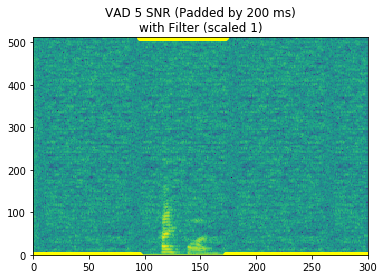

In [83]:
pyso.feats.plot_vad(y_snr5_wf, sr = sr,  use_beg_ms = use_beg_ms,
                    extend_window_ms=200,
                    title = 'VAD {} SNR (Padded by {} ms)\nwith Filter (scaled {})'.format(
                        snr5, 200, filter_scale))

## VAD after WF with postfilter (SNR 5)

#### Just messing around a bit really..

In [61]:
y_snr5_wf_pf, sr = pyso.filtersignal(y_snr5, filter_scale=4, 
                                   apply_postfilter=True)
ipd.Audio(y_snr5_wf_pf,rate=sr)

volume adjusted from 0.3 to 0.4


### No Padding

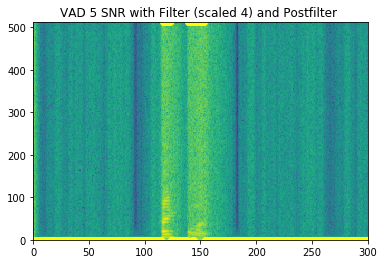

In [70]:
# fiddling around with the filter scale, postfilter, and `use_beg_ms`: 
pyso.feats.plot_vad(y_snr5_wf_pf, sr = sr,  use_beg_ms = 20,
                    title = 'VAD {} SNR with Filter (scaled 4) and Postfilter '.format(
                        snr5, filter_scale))

### With Padding

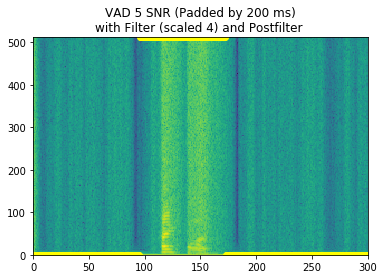

In [84]:
pyso.feats.plot_vad(y_snr5_wf_pf, sr = sr,  use_beg_ms = 20,
                    extend_window_ms=200,
                    title = 'VAD {} SNR (Padded by {} ms)\nwith Filter (scaled 4) and Postfilter '.format(
                        snr5, 200))

# Remove Non-Speech

## Speech Only (SNR 20)

In [40]:
y_snr20_speech, sr = pyso.dsp.get_vad_samples(y_snr20, sr=sr, 
                                          use_beg_ms = use_beg_ms)
y_snr20_speech_ew, sr = pyso.dsp.get_vad_samples(y_snr20, sr=sr, 
                                          use_beg_ms = use_beg_ms,
                                            extend_window_ms=extend_window_ms)


### No Padding

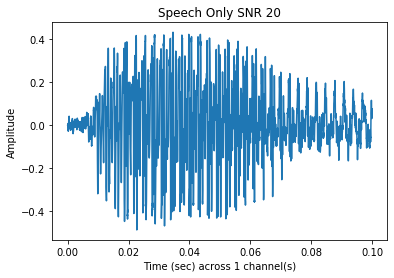

In [41]:
pyso.plotsound(y_snr20_speech, sr=sr, feature_type = 'signal',
               title = 'Speech Only SNR {}'.format(snr20))
ipd.Audio(y_snr20_speech,rate=sr)

### With Padding

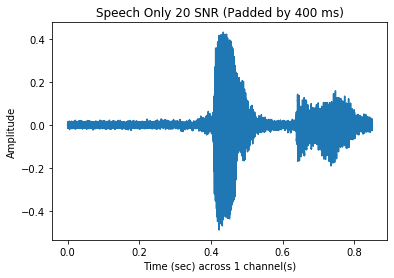

In [42]:
pyso.plotsound(y_snr20_speech_ew, sr=sr, feature_type = 'signal',
                    title = 'Speech Only {} SNR (Padded by {} ms)'.format(snr20, extend_window_ms))
ipd.Audio(y_snr20_speech_ew,rate=sr)

## Speech Only (SNR 5)

In [46]:
y_snr5_speech, sr = pyso.dsp.get_vad_samples(y_snr5, sr=sr, 
                                         use_beg_ms = use_beg_ms)
y_snr5_speech_ew, sr = pyso.dsp.get_vad_samples(y_snr5, sr=sr, 
                                         use_beg_ms = use_beg_ms,
                                            extend_window_ms=extend_window_ms)

### No Padding

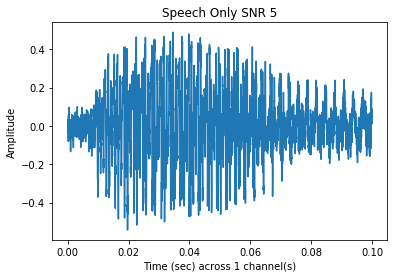

In [47]:
pyso.plotsound(y_snr5_speech, sr=sr, feature_type = 'signal', 
               title = 'Speech Only SNR {}'.format(snr5))
ipd.Audio(y_snr5_speech,rate=sr)

### With Padding

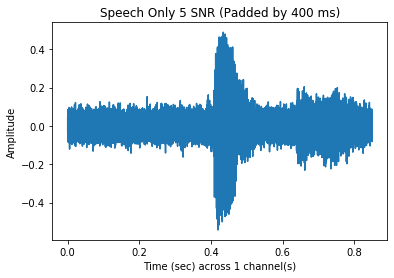

In [48]:
pyso.plotsound(y_snr5_speech_ew, sr=sr, feature_type = 'signal',
                    title = 'Speech Only {} SNR (Padded by {} ms)'.format(snr5, extend_window_ms))
ipd.Audio(y_snr5_speech_ew,rate=sr)

# Remove Non-Speech (with Filter)

## Speech Only (SNR 20 with Filter)

In [49]:
y_snr20_speech_wf, sr = pyso.dsp.get_vad_samples(y_snr20_wf, sr=sr, 
                                             use_beg_ms = use_beg_ms)
y_snr20_speech_wf_ew, sr = pyso.dsp.get_vad_samples(y_snr20_wf, sr=sr, 
                                             use_beg_ms = use_beg_ms,
                                                extend_window_ms=extend_window_ms)

### No Padding

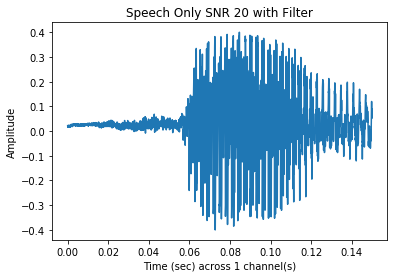

In [50]:
pyso.plotsound(y_snr20_speech_wf, sr=sr, feature_type = 'signal', 
               title = 'Speech Only SNR {} with Filter'.format(snr20))
ipd.Audio(y_snr20_speech_wf,rate=sr)

### With Padding

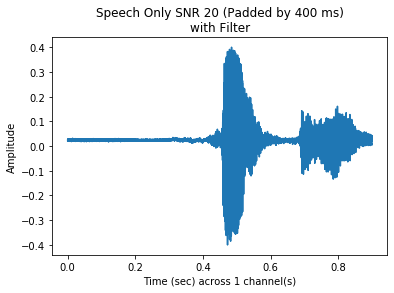

In [51]:
pyso.plotsound(y_snr20_speech_wf_ew, sr=sr, feature_type = 'signal', 
               title = 'Speech Only SNR {} (Padded by {} ms)\nwith Filter'.format(snr20, extend_window_ms))
ipd.Audio(y_snr20_speech_wf_ew,rate=sr)

## Speech Only (SNR 5 with Filter)

In [96]:
y_snr5_speech_wf, sr = pyso.dsp.get_vad_samples(y_snr5_wf, sr=sr, 
                                            use_beg_ms = use_beg_ms)
y_snr5_speech_wf_ew, sr = pyso.dsp.get_vad_samples(y_snr5_wf, sr=sr, 
                                            use_beg_ms = use_beg_ms,
                                            extend_window_ms=extend_window_ms)

### No Padding

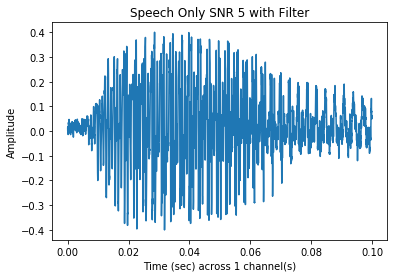

In [103]:
pyso.plotsound(y_snr5_speech_wf, sr=sr, feature_type = 'signal', 
               title = 'Speech Only SNR {} with Filter'.format(snr5))
ipd.Audio(y_snr5_speech_wf,rate=sr)

### With Padding

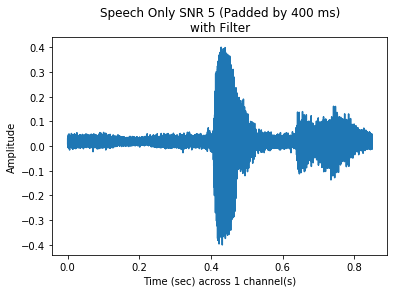

In [104]:
pyso.plotsound(y_snr5_speech_wf_ew, sr=sr, feature_type = 'signal', 
               title = 'Speech Only SNR {} (Padded by {} ms)\nwith Filter'.format(snr5, extend_window_ms))
ipd.Audio(y_snr5_speech_wf_ew,rate=sr)

## Playing with the postfilter audio data:

In [99]:
y_snr5_speech_wf_pf, sr = pyso.dsp.get_vad_samples(y_snr5_wf_pf, sr=sr, 
                                            use_beg_ms = 20)
y_snr5_speech_wf_pf_ew, sr = pyso.dsp.get_vad_samples(y_snr5_wf_pf, sr=sr, 
                                            use_beg_ms = 20,
                                            extend_window_ms=100)

### No Padding

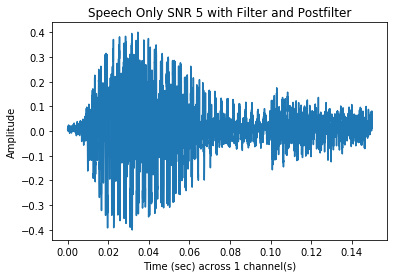

In [100]:
pyso.plotsound(y_snr5_speech_wf_pf, sr=sr, feature_type = 'signal', 
               title = 'Speech Only SNR {} with Filter and Postfilter'.format(snr5))
ipd.Audio(y_snr5_speech_wf_pf,rate=sr)

### With Padding

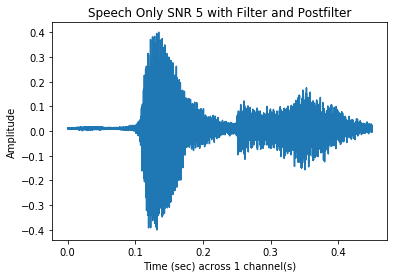

In [102]:
pyso.plotsound(y_snr5_speech_wf_pf_ew, sr=sr, feature_type = 'signal', 
               title = 'Speech Only SNR {} with Filter and Postfilter'.format(snr5))
ipd.Audio(y_snr5_speech_wf_pf_ew,rate=sr)